<a href="https://colab.research.google.com/github/KrishnaPandya-VGEC-IT/Brain_tumour_detection/blob/main/Vaidehi_final_year_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import datetime
from datetime import date
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 


cf.go_offline()

init_notebook_mode(connected=False)

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

**Reading csv**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/combined_csv.csv',error_bad_lines=False,encoding = "ISO-8859-1")
df['date'] = pd.to_datetime(df['date'],errors='coerce')
print("It has {} lines".format(len(df)))

b'Skipping line 70: expected 39 fields, saw 40\nSkipping line 2816: expected 39 fields, saw 40\nSkipping line 4946: expected 39 fields, saw 40\nSkipping line 5274: expected 39 fields, saw 40\nSkipping line 5412: expected 39 fields, saw 47\nSkipping line 5461: expected 39 fields, saw 40\nSkipping line 6034: expected 39 fields, saw 41\nSkipping line 7446: expected 39 fields, saw 40\nSkipping line 7554: expected 39 fields, saw 40\nSkipping line 7606: expected 39 fields, saw 40\nSkipping line 8199: expected 39 fields, saw 40\nSkipping line 9118: expected 39 fields, saw 40\nSkipping line 9601: expected 39 fields, saw 40\nSkipping line 10851: expected 39 fields, saw 41\nSkipping line 12512: expected 39 fields, saw 40\nSkipping line 14919: expected 39 fields, saw 40\n'
b'Skipping line 16800: expected 39 fields, saw 40\nSkipping line 17576: expected 39 fields, saw 40\nSkipping line 18111: expected 39 fields, saw 41\nSkipping line 19633: expected 39 fields, saw 44\nSkipping line 21723: expected

It has 545838 lines


In [ ]:
df.head(10)

Unnamed: 0                date  ...  Unnamed: 37  Unnamed: 38
0          0 2020-06-02 18:19:00  ...          NaN          NaN
1          1 2020-06-02 18:19:00  ...          NaN          NaN
2          2 2020-06-02 18:19:00  ...          NaN          NaN
3          3 2020-06-02 18:19:00  ...          NaN          NaN
4          4 2020-06-02 18:19:00  ...          NaN          NaN
5          5 2020-06-02 18:19:00  ...          NaN          NaN
6          6 2020-06-02 18:19:00  ...          NaN          NaN
7          7 2020-06-02 18:19:00  ...          NaN          NaN
8          8 2020-06-02 18:19:00  ...          NaN          NaN
9          9 2020-06-02 18:19:00  ...          NaN          NaN

[10 rows x 39 columns]

Dropping unnecessary columns

In [ ]:
df.drop(df.iloc[:, 11:40], inplace = True, axis = 1) 
  
df 


Unnamed: 0                date  ...      tweet_id  verified
0               0 2020-06-02 18:19:00  ...  1.230000e+18       0.0
1               1 2020-06-02 18:19:00  ...  1.230000e+18       0.0
2               2 2020-06-02 18:19:00  ...  1.230000e+18       0.0
3               3 2020-06-02 18:19:00  ...  1.230000e+18       0.0
4               4 2020-06-02 18:19:00  ...  1.230000e+18       0.0
...           ...                 ...  ...           ...       ...
545833        NaN 2020-08-24 00:00:00  ...           NaN       NaN
545834        NaN 2020-08-24 00:00:00  ...           NaN       NaN
545835        NaN 2020-08-24 00:00:00  ...           NaN       NaN
545836        NaN 2020-08-24 00:00:00  ...           NaN       NaN
545837        NaN 2020-08-24 00:00:00  ...           NaN       NaN

[545838 rows x 11 columns]

**Data cleaning**

Removing Twitter handles (@user)

In [ ]:
df['tweet'] = df['tweet'].str.replace("@", "") 
df.head()

Unnamed: 0                date  ...      tweet_id  verified
0          0 2020-06-02 18:19:00  ...  1.230000e+18       0.0
1          1 2020-06-02 18:19:00  ...  1.230000e+18       0.0
2          2 2020-06-02 18:19:00  ...  1.230000e+18       0.0
3          3 2020-06-02 18:19:00  ...  1.230000e+18       0.0
4          4 2020-06-02 18:19:00  ...  1.230000e+18       0.0

[5 rows x 11 columns]

Removing links

In [ ]:
df['tweet'] = df['tweet'].str.replace(r"http\S+", "") 
df.head()

Unnamed: 0                date  ...      tweet_id  verified
0          0 2020-06-02 18:19:00  ...  1.230000e+18       0.0
1          1 2020-06-02 18:19:00  ...  1.230000e+18       0.0
2          2 2020-06-02 18:19:00  ...  1.230000e+18       0.0
3          3 2020-06-02 18:19:00  ...  1.230000e+18       0.0
4          4 2020-06-02 18:19:00  ...  1.230000e+18       0.0

[5 rows x 11 columns]

Removing Punctuations, Numbers, and Special Characters

In [ ]:
df['tweet'] = df['tweet'].str.replace("[^a-zA-Z]", " ") 
df.head()

Unnamed: 0                date  ...      tweet_id  verified
0          0 2020-06-02 18:19:00  ...  1.230000e+18       0.0
1          1 2020-06-02 18:19:00  ...  1.230000e+18       0.0
2          2 2020-06-02 18:19:00  ...  1.230000e+18       0.0
3          3 2020-06-02 18:19:00  ...  1.230000e+18       0.0
4          4 2020-06-02 18:19:00  ...  1.230000e+18       0.0

[5 rows x 11 columns]

Removing Stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords=nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text


In [ ]:
df['tweet'] = df['tweet'].astype(str).apply(lambda text : remove_stopwords(text.lower()))

Removing small words with length <=3

In [ ]:
df['tweet'] = df['tweet'].astype(str).apply(lambda x: ' '.join([w for w in x.split(' ') if len(w)>3]))
df.head()

Unnamed: 0                date  ...      tweet_id  verified
0          0 2020-06-02 18:19:00  ...  1.230000e+18       0.0
1          1 2020-06-02 18:19:00  ...  1.230000e+18       0.0
2          2 2020-06-02 18:19:00  ...  1.230000e+18       0.0
3          3 2020-06-02 18:19:00  ...  1.230000e+18       0.0
4          4 2020-06-02 18:19:00  ...  1.230000e+18       0.0

[5 rows x 11 columns]

**Finding top 10 trends**

In [ ]:
hashtags = 10

In [ ]:
start_date = '02-06-2020'
end_date = '10-09-2020'

In [ ]:
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask]
print("It has {} tweets beetween {} and {}".format(len(df),start_date,end_date))

It has 491593 tweets beetween 02-06-2020 and 10-09-2020


In [ ]:
import re
from collections import Counter

def extractHashtags(tweet,phrase_counter):
    occurences = re.findall(r"[A-Za-z0-9]+",str(tweet)) #removed '#' from the sentence
    
    for hashtag in occurences:
        phrase_counter[hashtag] += 1


phrase_counter = Counter()

for index, row in df.iterrows():
    tweet = str(row['tweet']).lower()
    extractHashtags(tweet, phrase_counter)

Printing most common phrases

In [ ]:
most_common_phrases = phrase_counter.most_common(hashtags)
graph_title = "The {} most tweeted hashtags beetween {} and {}".format(hashtags,start_date,end_date)

terms = list()
for k,v in most_common_phrases:
    print ('{0: <5}'.format(v), k)
    #print('length : ',len(k))
    terms.append(k)

265650 coronavirus
250588 covid
67219 trump
42034 people
34396 cases
28989 deaths
24351 china
20288 pandemic
18567 like
17863 wuhan


Fetching the trends from most_common_phrases

In [ ]:
trends = []
for k,v in most_common_phrases:
  k = k.split('#')[-1]
  trends.append(k) 

**Plotting graphs of trends**

In [ ]:
df2 = df

In [ ]:
#label = "day"
#label = "month"
label = "week"
#label = "dayofweek"

In [ ]:
dataframes = list()


for term in terms:
    df2_term = df2[df2["tweet"].str.lower().str.contains(term, na=False)]
    df2_term.to_csv("out.csv",index = False)

    df2_term['month'] = df2_term['date'].dt.month
    df2_term['day'] = df2_term['date'].dt.date
    df2_term['week'] = df2_term['date'].dt.week
    df2_term['dayofweek'] = df2_term['date'].dt.dayofweek

    df2_term = df2_term.groupby([label]).size().reset_index(name=term)
    df2_term = df2_term.set_index(label)

    dataframes.append(df2_term)

df2 = pd.concat(dataframes, axis=1).reset_index(drop=False).fillna(0)
df2 = df2.set_index(label)
df2 = df2.sort_index()
# df.to_csv("occurances.csv".format(term))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
configure_plotly_browser_state()
df2.iplot(kind='line',mode='markers+lines',title=graph_title,xTitle=label,yTitle="Count")

**Checking whether the tweet is positive or negative**

In [ ]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 

In [ ]:
def get_tweet_sentiment(tweet): 
		''' 
		Utility function to classify sentiment of passed tweet 
		using textblob's sentiment method 
		'''
		# create TextBlob object of passed tweet text 
		analysis = TextBlob(clean_tweet(tweet)) 
		# set sentiment 
		if analysis.sentiment.polarity > 0: 
			return 'positive' #c
		elif analysis.sentiment.polarity == 0: 
			return 'neutral' #c
		else: 
			return 'negative' #c

In [ ]:
	def clean_tweet(tweet): 
		''' 
		Utility function to clean tweet text by removing links, special characters 
		using simple regex statements. 
		'''
		return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 


In [ ]:
print(trends)

['coronavirus', 'covid', 'trump', 'people', 'cases', 'deaths', 'china', 'pandemic', 'like', 'wuhan']


In [ ]:
df['polarity'] = 'unknown'

In [ ]:
df.head()

Unnamed: 0                date  ...  verified  polarity
0          0 2020-06-02 18:19:00  ...       0.0   unknown
1          1 2020-06-02 18:19:00  ...       0.0   unknown
2          2 2020-06-02 18:19:00  ...       0.0   unknown
3          3 2020-06-02 18:19:00  ...       0.0   unknown
4          4 2020-06-02 18:19:00  ...       0.0   unknown

[5 rows x 12 columns]

In [ ]:
df['polarity'] = df['tweet'].apply(get_tweet_sentiment)

In [ ]:
df.head(100)

Unnamed: 0                date  ...  verified  polarity
0           0 2020-06-02 18:19:00  ...       0.0   neutral
1           1 2020-06-02 18:19:00  ...       0.0   neutral
2           2 2020-06-02 18:19:00  ...       0.0   neutral
3           3 2020-06-02 18:19:00  ...       0.0   neutral
4           4 2020-06-02 18:19:00  ...       0.0   neutral
..        ...                 ...  ...       ...       ...
95         20 2020-06-02 18:20:00  ...       0.0   neutral
96         21 2020-06-02 18:20:00  ...       0.0  positive
97         22 2020-06-02 18:20:00  ...       0.0  positive
98         23 2020-06-02 18:20:00  ...       0.0  positive
99         24 2020-06-02 18:20:00  ...       0.0   neutral

[100 rows x 12 columns]

In [ ]:
print(len(df[df['polarity']=='positive'])) #number of positive tweets #c

152738


In [ ]:
print(len(df[df['polarity'] == 'neutral'])) #number of neutral tweets #c

234751


In [ ]:
print(len(df[df['polarity'] == 'negative'])) #number of negative tweets #c

104104


**Wordcloud of positive and negative tweets**

Note: The tweet that is positive may contain negative word. i.e., "People who are dying due to coronavirus are decreasing." - In this tweet *dying* is negative word but overall tweet is positive. Hence, positive tweet wordcloud may contain negative word or vice versa.

Wordcloud of all words

In [ ]:
import matplotlib.pyplot as plt

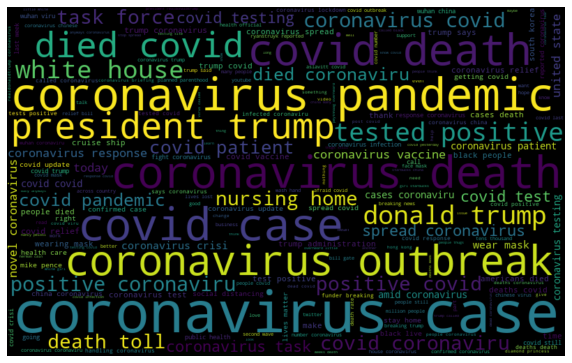

In [ ]:
all_words = ' '.join([text for text in df['tweet']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Wordcloud of positive words

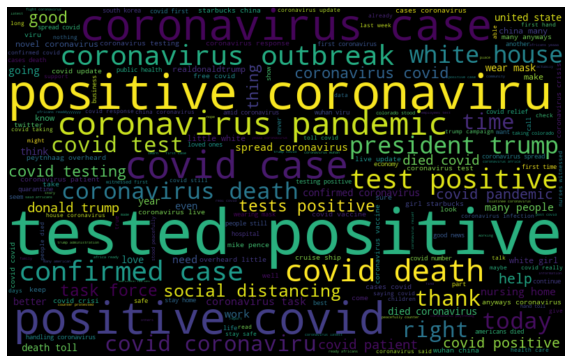

In [ ]:
positive_words =' '.join([text for text in df['tweet'][df['polarity'] == 'positive']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Wordcloud of negative words

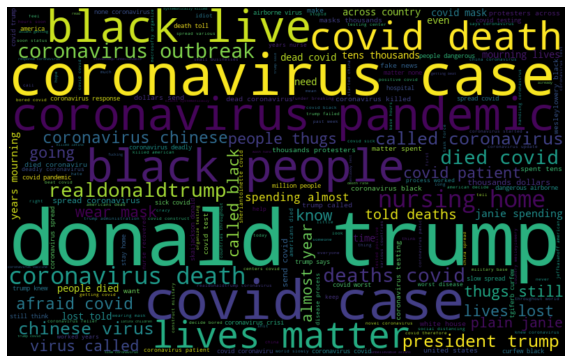

In [ ]:
negative_words =' '.join([text for text in df['tweet'][df['polarity'] == 'negative']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Wordcloud of neutral words

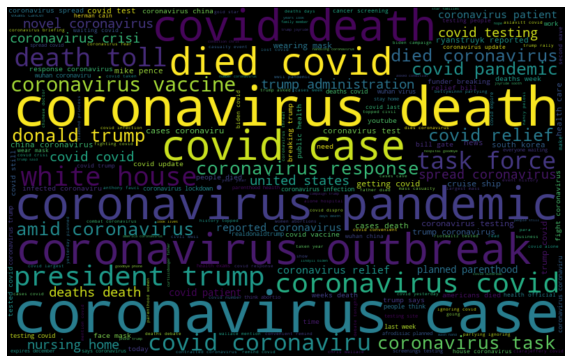

In [ ]:
neutral_words =' '.join([text for text in df['tweet'][df['polarity'] == 'neutral']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

**Model training** **[DO NOT RERUN THIS PHASE. IT WILL TAKE 8-24 HOURS TO COMPLETE THE PROCESS OF 5 MODELS DEPENDING UPON INTERNET AND PROCESSOR]** 

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
cv = count_vectorizer.fit_transform(df['tweet']) #converting tweet into vector
cv.shape

(491593, 216251)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(cv,df['polarity'] , test_size=.2,stratify=df['polarity'], random_state=42)

XGB classifier

In [ ]:
xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(prediction_xgb,y_test))

0.926118044325105


Random Forest Classifier (This model takes about 20-24 hours to be built)

In [ ]:
rf = RandomForestClassifier(n_estimators=4, random_state=1)
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)
print(accuracy_score(prediction_rf,y_test)) 


0.9181440006509424


Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction_lr = lr.predict(X_test)
print(accuracy_score(prediction_lr,y_test))

0.9564682309624792


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



KNN algorithm

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
pip install scipy

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [ ]:
st_x = StandardScaler()
classifier.fit(X_test,y_test)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.7135955410449659


**Graphs of Positive, Negative and Neutral tweets by trends**

In [ ]:
df.head(10)

Unnamed: 0                date  ...  verified  polarity
0          0 2020-06-02 18:19:00  ...       0.0   neutral
1          1 2020-06-02 18:19:00  ...       0.0   neutral
2          2 2020-06-02 18:19:00  ...       0.0   neutral
3          3 2020-06-02 18:19:00  ...       0.0   neutral
4          4 2020-06-02 18:19:00  ...       0.0   neutral
5          5 2020-06-02 18:19:00  ...       0.0   neutral
6          6 2020-06-02 18:19:00  ...       0.0   neutral
7          7 2020-06-02 18:19:00  ...       0.0  positive
8          8 2020-06-02 18:19:00  ...       0.0   neutral
9          9 2020-06-02 18:19:00  ...       0.0   neutral

[10 rows x 12 columns]

In [ ]:
print(trends)

['coronavirus', 'covid', 'trump', 'people', 'cases', 'deaths', 'china', 'pandemic', 'like', 'wuhan']


In [ ]:
def trend_existance(tweet):
  l = []
  for i in range(0,len(trends)):
    if trends[i] in tweet:
      l.append(trends[i])
  return l

In [ ]:
df['check_exitance'] = df['tweet'].apply(trend_existance)
df.head(10) 

Unnamed: 0                date  ...  polarity        check_exitance
0          0 2020-06-02 18:19:00  ...   neutral         [coronavirus]
1          1 2020-06-02 18:19:00  ...   neutral  [coronavirus, china]
2          2 2020-06-02 18:19:00  ...   neutral         [coronavirus]
3          3 2020-06-02 18:19:00  ...   neutral         [coronavirus]
4          4 2020-06-02 18:19:00  ...   neutral         [coronavirus]
5          5 2020-06-02 18:19:00  ...   neutral         [coronavirus]
6          6 2020-06-02 18:19:00  ...   neutral         [coronavirus]
7          7 2020-06-02 18:19:00  ...  positive         [coronavirus]
8          8 2020-06-02 18:19:00  ...   neutral         [coronavirus]
9          9 2020-06-02 18:19:00  ...   neutral         [coronavirus]

[10 rows x 13 columns]

Trend of coronavirus

In [ ]:
selection = ['coronavirus']
sample = df.check_exitance.apply(lambda x: any(item for item in selection if item in x))
df_coronavirus = df[sample]

In [ ]:
df_coronavirus['group_by_date'] = df_coronavirus['date'].astype(str).str[0:7]
df_coronavirus['temp_column'] = 1

Text(0, 0.5, 'Count')

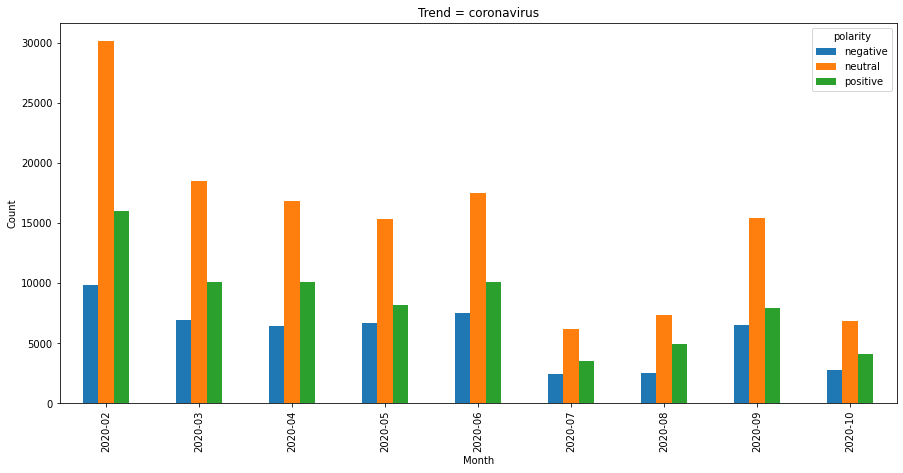

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Trend = coronavirus')
df_coronavirus.groupby(['group_by_date','polarity']).count()['temp_column'].unstack().plot(kind = 'bar',ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Count')


Trend of covid

In [ ]:
selection = ['covid']
sample = df.check_exitance.apply(lambda x: any(item for item in selection if item in x))
df_covid = df[sample]

In [ ]:
df_covid['group_by_date'] = df_covid['date'].astype(str).str[0:7]
df_covid['temp_column'] = 1

Text(0, 0.5, 'Count')

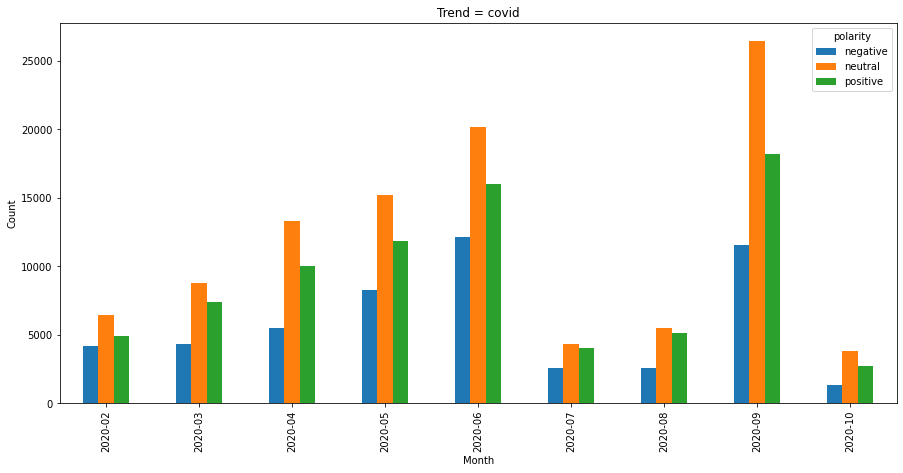

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Trend = covid')
df_covid.groupby(['group_by_date','polarity']).count()['temp_column'].unstack().plot(kind = 'bar',ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Count')


Trend of trump

In [ ]:
selection = ['trump']
sample = df.check_exitance.apply(lambda x: any(item for item in selection if item in x))
df_trump = df[sample]

In [ ]:
df_trump['group_by_date'] = df_covid['date'].astype(str).str[0:7]
df_trump['temp_column'] = 1

Text(0, 0.5, 'Count')

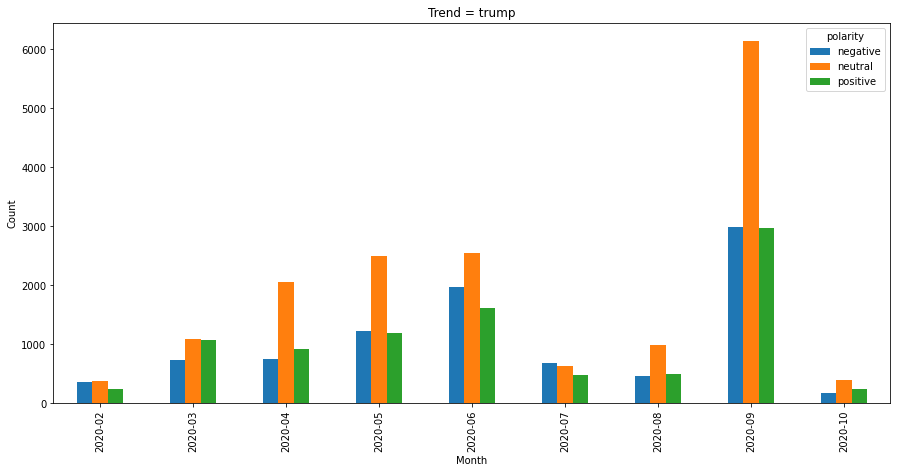

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Trend = trump')
df_trump.groupby(['group_by_date','polarity']).count()['temp_column'].unstack().plot(kind = 'bar',ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Count')


trend of people

In [ ]:
selection = ['people']
sample = df.check_exitance.apply(lambda x: any(item for item in selection if item in x))
df_people = df[sample]

In [ ]:
df_people['group_by_date'] = df_covid['date'].astype(str).str[0:7]
df_people['temp_column'] = 1

Text(0, 0.5, 'Count')

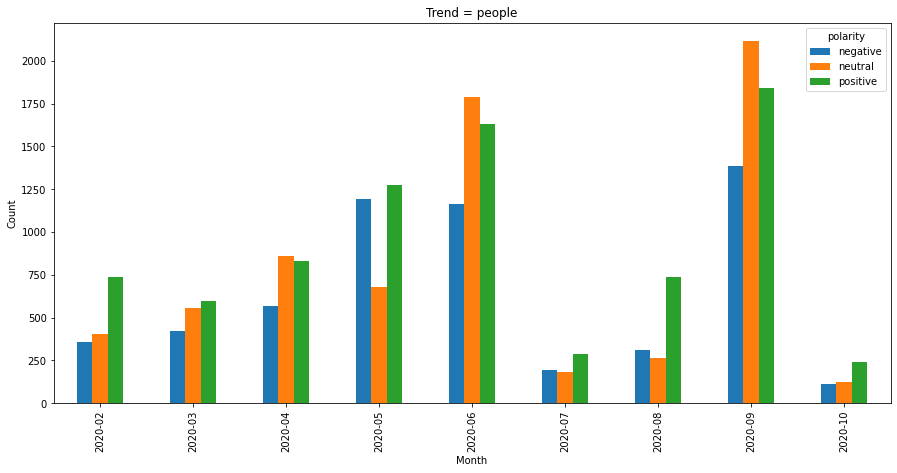

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Trend = people')
df_people.groupby(['group_by_date','polarity']).count()['temp_column'].unstack().plot(kind = 'bar',ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Count')


Trend of cases

In [ ]:
selection = ['cases']
sample = df.check_exitance.apply(lambda x: any(item for item in selection if item in x))
df_cases = df[sample]

In [ ]:
df_cases['group_by_date'] = df_covid['date'].astype(str).str[0:7]
df_cases['temp_column'] = 1

Text(0, 0.5, 'Count')

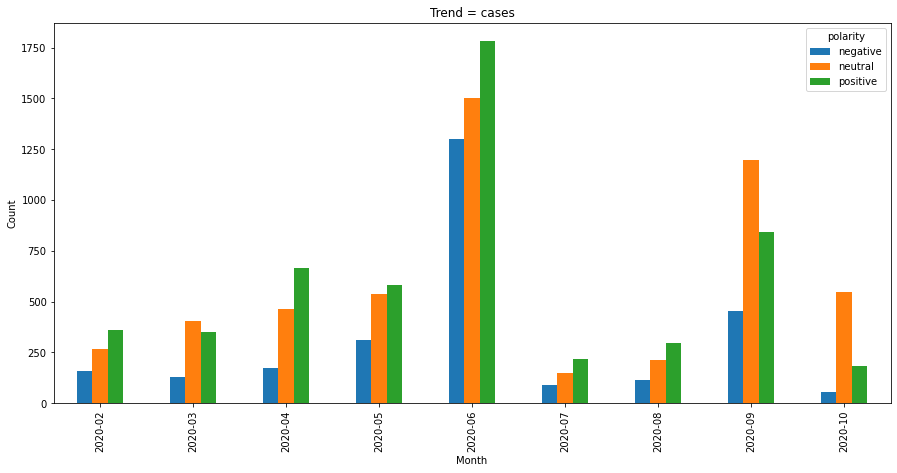

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Trend = cases')
df_cases.groupby(['group_by_date','polarity']).count()['temp_column'].unstack().plot(kind = 'bar',ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Count')


Trend of deaths

In [ ]:
selection = ['deaths']
sample = df.check_exitance.apply(lambda x: any(item for item in selection if item in x))
df_deaths = df[sample]

In [ ]:
df_deaths['group_by_date'] = df_covid['date'].astype(str).str[0:7]
df_deaths['temp_column'] = 1

Text(0, 0.5, 'Count')

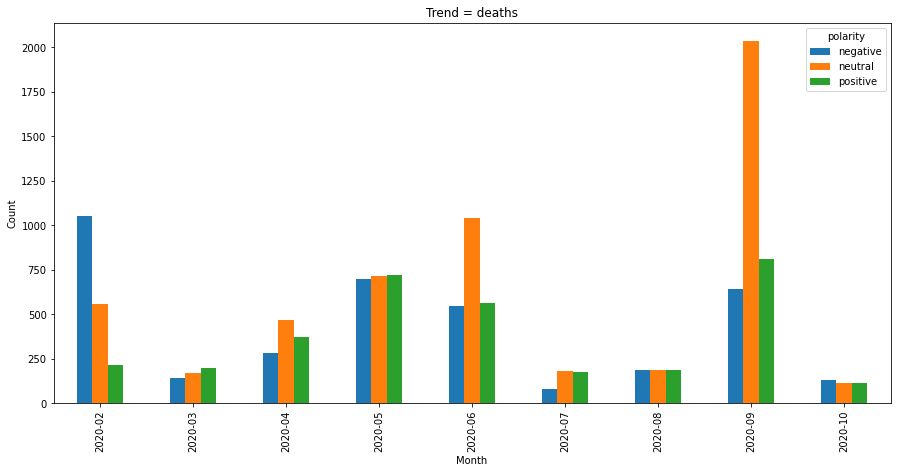

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Trend = deaths')
df_deaths.groupby(['group_by_date','polarity']).count()['temp_column'].unstack().plot(kind = 'bar',ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Count')


Trend of china

In [ ]:
selection = ['china']
sample = df.check_exitance.apply(lambda x: any(item for item in selection if item in x))
df_china = df[sample]

In [ ]:
df_china['group_by_date'] = df_covid['date'].astype(str).str[0:7]
df_china['temp_column'] = 1

Text(0, 0.5, 'Count')

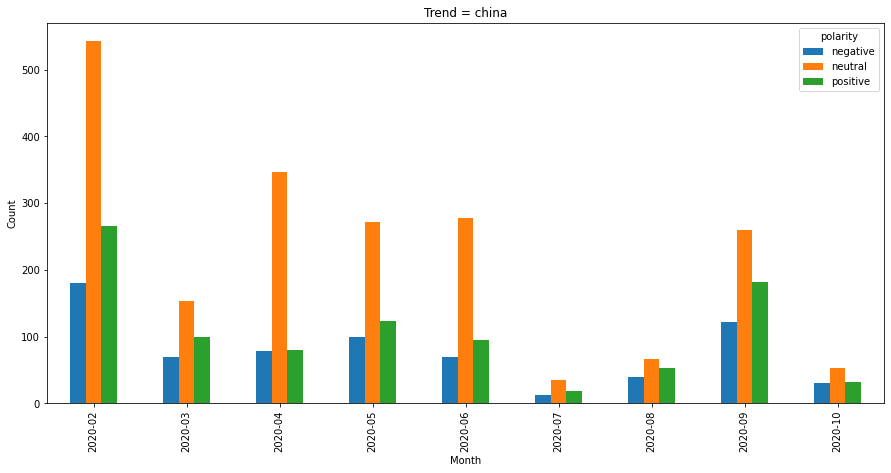

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Trend = china')
df_china.groupby(['group_by_date','polarity']).count()['temp_column'].unstack().plot(kind = 'bar',ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Count')

Trend of pandemic

In [ ]:
selection = ['pandemic']
sample = df.check_exitance.apply(lambda x: any(item for item in selection if item in x))
df_pandemic = df[sample]

In [ ]:
df_pandemic['group_by_date'] = df_covid['date'].astype(str).str[0:7]
df_pandemic['temp_column'] = 1

Text(0, 0.5, 'Count')

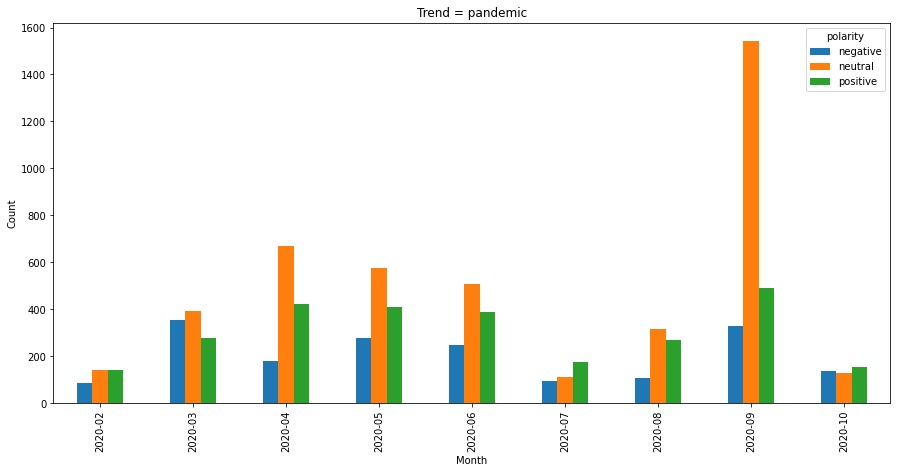

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Trend = pandemic')
df_pandemic.groupby(['group_by_date','polarity']).count()['temp_column'].unstack().plot(kind = 'bar',ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Count')

Trend of like

In [ ]:
selection = ['like']
sample = df.check_exitance.apply(lambda x: any(item for item in selection if item in x))
df_like = df[sample]

In [ ]:
df_like['group_by_date'] = df_covid['date'].astype(str).str[0:7]
df_like['temp_column'] = 1

Text(0, 0.5, 'Count')

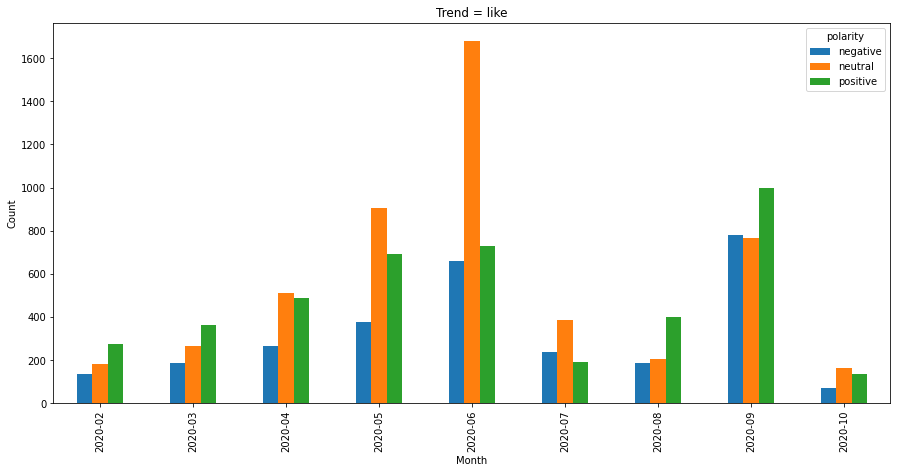

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Trend = like')
df_like.groupby(['group_by_date','polarity']).count()['temp_column'].unstack().plot(kind = 'bar',ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Count')

Trend of wuhan

In [ ]:
selection = ['wuhan']
sample = df.check_exitance.apply(lambda x: any(item for item in selection if item in x))
df_wuhan = df[sample]

In [ ]:
df_wuhan['group_by_date'] = df_covid['date'].astype(str).str[0:7]
df_wuhan['temp_column'] = 1

Text(0, 0.5, 'Count')

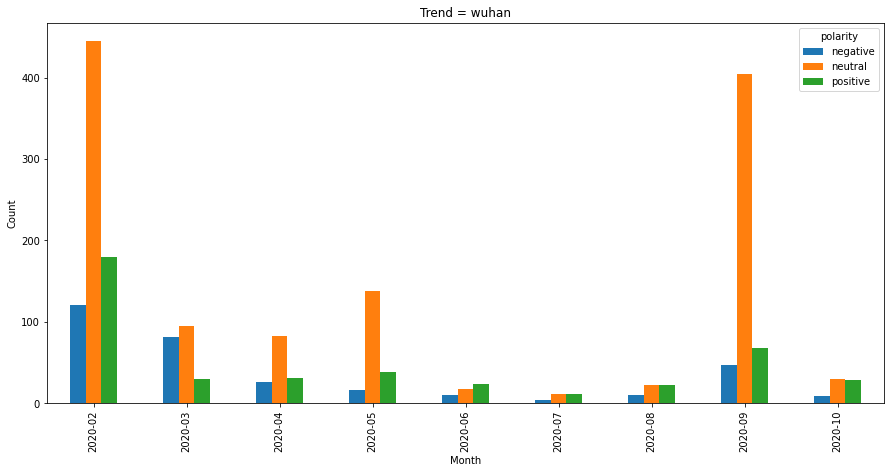

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Trend = wuhan')
df_wuhan.groupby(['group_by_date','polarity']).count()['temp_column'].unstack().plot(kind = 'bar',ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Count')